In [1]:
# Data Science Project: Planning Stage (Individual)
## Problem: Predicting Usage of a Video Game Research Server

# Board Question: What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

# Research Question: Can experience level, age, gender and playtime predict whether a player subscribes to the newsletter?

# Response variable: subscribe 

# Predictor variables: experience, age, gender, and played_hours

In [2]:
# Preprocessing and exploratory data analysis

In [3]:
# Importing libraries and formatting graphs

In [4]:
# load necessary packages
library(tidyverse)
library(lubridate)
library(knitr)
library(ggplot2)
library(scales)
library(dplyr)
library(readr)

# formatting graphs
options(repr.plot.width = 10, repr.plot.height = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [5]:
# Importing the dataset

In [6]:
# load datasets
players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
# Initial Data Exploration

In [8]:
# check dimensions
cat("=== DATASET OVERVIEW ===\n")
cat("Players dataset:", nrow(players), "rows and", ncol(players), "columns\n")
cat("Sessions dataset:", nrow(sessions), "rows and", ncol(sessions), "columns\n")

=== DATASET OVERVIEW ===
Players dataset: 196 rows and 7 columns
Sessions dataset: 1535 rows and 5 columns


In [9]:
# data description-players dataset

In [10]:
cat("=== PLAYERS DATASET DESCRIPTION ===\n\n")

# display first few rows
head(players)

# summary of the dataset structure
cat("\nDataset Structure:\n")
glimpse(players)

# variable descriptions and types
cat("\n--- Variable Descriptions ---\n\n")
cat("1. experience (categorical): Player's experience level\n")
cat(" - Levels: Beginner, Amateur, Regular, Veteran, Pro\n")
cat(" - Type: Character\n\n")

cat("2. subscribe (binary): Whether player subscribed to newsletter\n")
cat(" - Values: TRUE (subscribed), FALSE (not subscribed)\n")
cat(" - Type: Logical\n")
cat(" - This is our response variable\n\n")

cat("3. hashedEmail (identifier): Unique anonymized identifier for each player\n")
cat(" - Type: Character\n")
cat(" - Links to sessions dataset\n\n")

cat("4. played_hours (numeric): Total hours the player spent in the game\n")
cat(" - Type: Double (numeric)\n")
cat(" - Range: 0 to", max(players$played_hours, na.rm = TRUE), "hours\n\n")

cat("5. name (categorical): Player's name\n")
cat(" - Type: Character\n\n")

cat("6. gender (categorical): Player's gender identity\n")
cat(" - Type: Character\n\n")

cat("7. Age (numeric): Player's age in years\n")
cat(" - Type: Double (numeric)\n")
cat(" - Contains missing values (NA)\n\n")


=== PLAYERS DATASET DESCRIPTION ===



experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17



Dataset Structure:
Rows: 196
Columns: 7
$ experience   <chr> "Pro", "Veteran", "Veteran", "Amateur", "Regular", "Amate…
$ subscribe    <lgl> TRUE, TRUE, FALSE, TRUE, TRUE, TRUE, TRUE, FALSE, TRUE, T…
$ hashedEmail  <chr> "f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8…
$ played_hours <dbl> 30.3, 3.8, 0.0, 0.7, 0.1, 0.0, 0.0, 0.0, 0.1, 0.0, 1.6, 0…
$ name         <chr> "Morgan", "Christian", "Blake", "Flora", "Kylie", "Adrian…
$ gender       <chr> "Male", "Male", "Male", "Female", "Male", "Female", "Fema…
$ Age          <dbl> 9, 17, 17, 21, 21, 17, 19, 21, 47, 22, 23, 17, 25, 22, 17…

--- Variable Descriptions ---

1. experience (categorical): Player's experience level
 - Levels: Beginner, Amateur, Regular, Veteran, Pro
 - Type: Character

2. subscribe (binary): Whether player subscribed to newsletter
 - Values: TRUE (subscribed), FALSE (not subscribed)
 - Type: Logical
 - This is our response variable

3. hashedEmail (identifier): Unique anonymized identifier for each player

In [11]:
# Summary Statistics for Players dataset

In [12]:
cat("\n=== SUMMARY STATISTICS ===\n\n")

# summary statistics for numeric variables
cat("\n--- Numeric Variables Summary ---\n\n")

# calculate statistics for played_hours
cat("played_hours:\n")
cat(" Mean:", round(mean(players$played_hours, na.rm = TRUE),2), "hours\n")
cat(" Median:", round(median(players$played_hours, na.rm = TRUE),2), "hours\n")
cat(" SD:", round(sd(players$played_hours, na.rm = TRUE),2), "\n")
cat(" Min:", round(min(players$played_hours, na.rm = TRUE),2), "hours\n")
cat(" Max:", round(max(players$played_hours, na.rm = TRUE),2), "hours\n")

# calculate statistics for Age
cat("Age:\n")
cat(" Mean:", round(mean(players$Age, na.rm = TRUE),2), "years\n")
cat(" Median:", round(median(players$Age, na.rm = TRUE),2), "years\n")
cat(" SD:", round(sd(players$Age, na.rm = TRUE),2), "\n")
cat(" Min:", round(min(players$Age, na.rm = TRUE),2), "years\n")
cat(" Max:", round(max(players$Age, na.rm = TRUE),2), "yearss\n")
# cat(" Missing values:", sum(is.na(players$Age), "\n\n"))

# table of mean values for all quantitative variables
numeric_summary <- players |>
summarise(mean_played_hours = round(mean(played_hours, na.rm = TRUE), 2),
          mean_age = round(mean(Age, na.rm = TRUE), 2))

cat("Table of Mean Values:\n")
print(numeric_summary)
cat("\n")

# summary for categorical variables
cat("\n--- Categorical Variables Summary ---\n\n")

# experience levels
cat("Experience Distribution:\n")
print(table(players$experience))
cat("\n")

# subscription status (our response variable)
cat("Subscription Distribution:\n")
print(table(players$subscribe))
# cat(" Subscription rate:",
    # round(mean(players$subscribe)*100, 2), "%\n\n")

# gender distribution
cat("Gender Distribution:\n")
print(table(players$gender))
cat("\n")


=== SUMMARY STATISTICS ===


--- Numeric Variables Summary ---

played_hours:
 Mean: 5.85 hours
 Median: 0.1 hours
 SD: 28.36 
 Min: 0 hours
 Max: 223.1 hours
Age:
 Mean: 21.14 years
 Median: 19 years
 SD: 7.39 
 Min: 9 years
 Max: 58 yearss
Table of Mean Values:
# A tibble: 1 × 2
  mean_played_hours mean_age
              <dbl>    <dbl>
1              5.85     21.1


--- Categorical Variables Summary ---

Experience Distribution:

 Amateur Beginner      Pro  Regular  Veteran 
      63       35       14       36       48 

Subscription Distribution:

FALSE  TRUE 
   52   144 
Gender Distribution:

          Agender            Female              Male        Non-binary 
                2                37               124                15 
            Other Prefer not to say      Two-Spirited 
                1                11                 6 



In [13]:
# checking for missing values
cat("\nMissing values in each column:\n")
colSums(is.na(players))

# checking for unique values in categorical variables
cat("\nExperience levels:", unique(players$experience), "\n")
cat("\nGender status:", unique(players$gender), "\n")
cat("\nSubscription status:", table(players$subscribe), "\n")


Missing values in each column:


experience    subscribe  hashedEmail played_hours         name       gender 
           0            0            0            0            0            0 
         Age 
           2


Experience levels: Pro Veteran Amateur Regular Beginner 

Gender status: Male Female Non-binary Prefer not to say Agender Two-Spirited Other 

Subscription status: 52 144 


In [14]:
# identify potential issues

In [15]:
# data description-sessions dataset

In [16]:
cat("=== SESSIONS DATASET DESCRIPTION ===\n\n")

# display first few rows
head(players)

# summary of the dataset structure
cat("\nDataset Structure:\n")
glimpse(sessions)

# variable descriptions and types
cat("\nSessions Dataset Variables:\n")
cat("1. hashedEmail: Links to players dataset\n")
cat("2. start_time: Session start timestamp\n")
cat("3. end_time: Session end timestamp\n")
cat("4. original_start_time: Original start time in numeric format\n")
cat("5. original_end_time: Original end time in numeric format\n\n")

cat("This dataset can be used to calculate:\n")
cat(" - Number of sessions per player\n")
cat(" - Patterns of session durations\n")
cat(" - Playing frequency\n\n")

=== SESSIONS DATASET DESCRIPTION ===



experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17



Dataset Structure:
Rows: 1,535
Columns: 5
$ hashedEmail         <chr> "bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8a…
$ start_time          <chr> "30/06/2024 18:12", "17/06/2024 23:33", "25/07/202…
$ end_time            <chr> "30/06/2024 18:24", "17/06/2024 23:46", "25/07/202…
$ original_start_time <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…
$ original_end_time   <dbl> 1.71977e+12, 1.71867e+12, 1.72193e+12, 1.72188e+12…

Sessions Dataset Variables:
1. hashedEmail: Links to players dataset
2. start_time: Session start timestamp
3. end_time: Session end timestamp
4. original_start_time: Original start time in numeric format
5. original_end_time: Original end time in numeric format

This dataset can be used to calculate:
 - Number of sessions per player
 - Patterns of session durations
 - Playing frequency



In [17]:
# Data Wrangling

In [18]:
cat("=== DATA WRANGLING PLAN ===")
# create a clean version of the dataset for modeling
players_clean <- players |>
select(hashedEmail, subscribe, experience, Age, gender, played_hours) |>
mutate(
    subscribe = factor(subscribe, levels = c("FALSE", "TRUE")),
    experience = factor(experience, 
                        levels = c("Beginner", "Amateur", "Regular", "Veteran", "Pro"),
                        ordered = TRUE))
cat("Cleaned dataset preview:\n")
head(players_clean)
cat("\n")
cat("Cleaned dataset has", 
    nrow(players_clean), 
    ncol(players_clean), 
    "variables\n\n")

=== DATA WRANGLING PLAN ===Cleaned dataset preview:


hashedEmail,subscribe,experience,Age,gender,played_hours
<chr>,<fct>,<ord>,<dbl>,<chr>,<dbl>
f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,TRUE,Pro,9,Male,30.3
f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,TRUE,Veteran,17,Male,3.8
b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,FALSE,Veteran,17,Male,0.0
23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,TRUE,Amateur,21,Female,0.7
7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,TRUE,Regular,21,Male,0.1
f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,TRUE,Amateur,17,Female,0.0



Cleaned dataset has 196 6 variables



In [19]:
# Visualizations

In [20]:
cat("=== EXPLORATORY DATA ANALYSIS AND VISUALIZATION ===\n\n")

=== EXPLORATORY DATA ANALYSIS AND VISUALIZATION ===



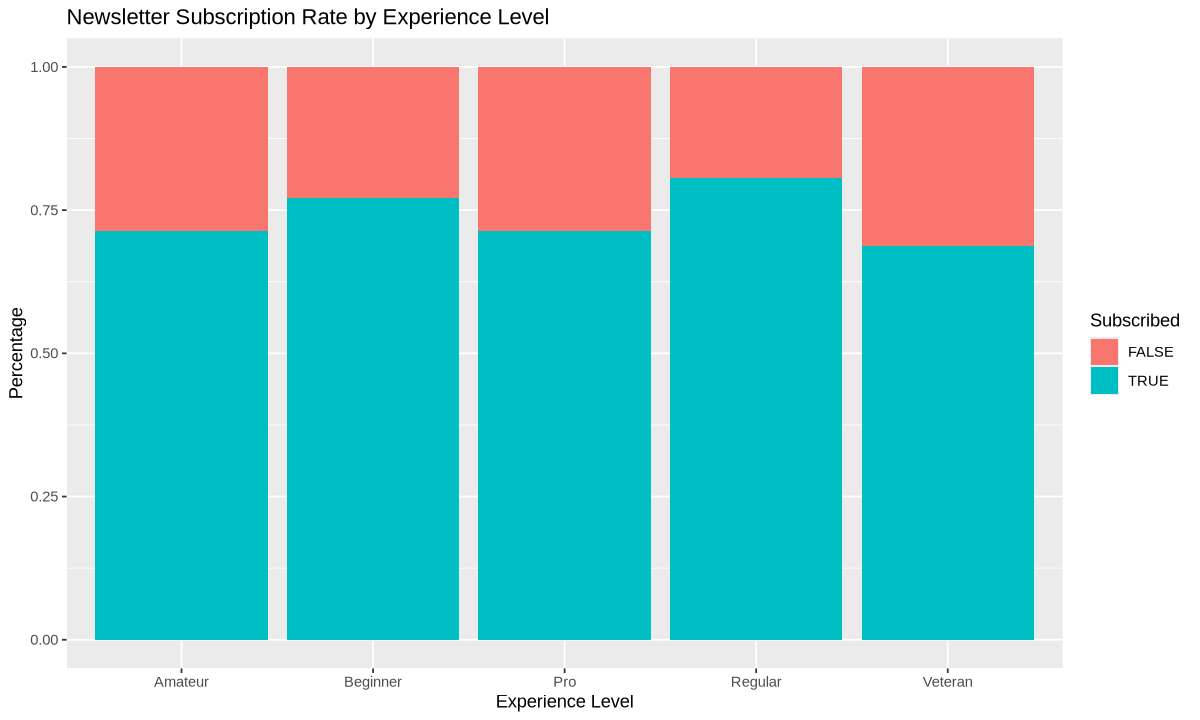

In [21]:
# Visualization 1: SUBSCRIPTION RATE BY EXPERIENCE
ggplot(players, aes(x=experience, fill=subscribe))+
geom_bar(position="fill")+
labs(title="Newsletter Subscription Rate by Experience Level",
     x="Experience Level",
     y="Percentage",
     fill="Subscribed")

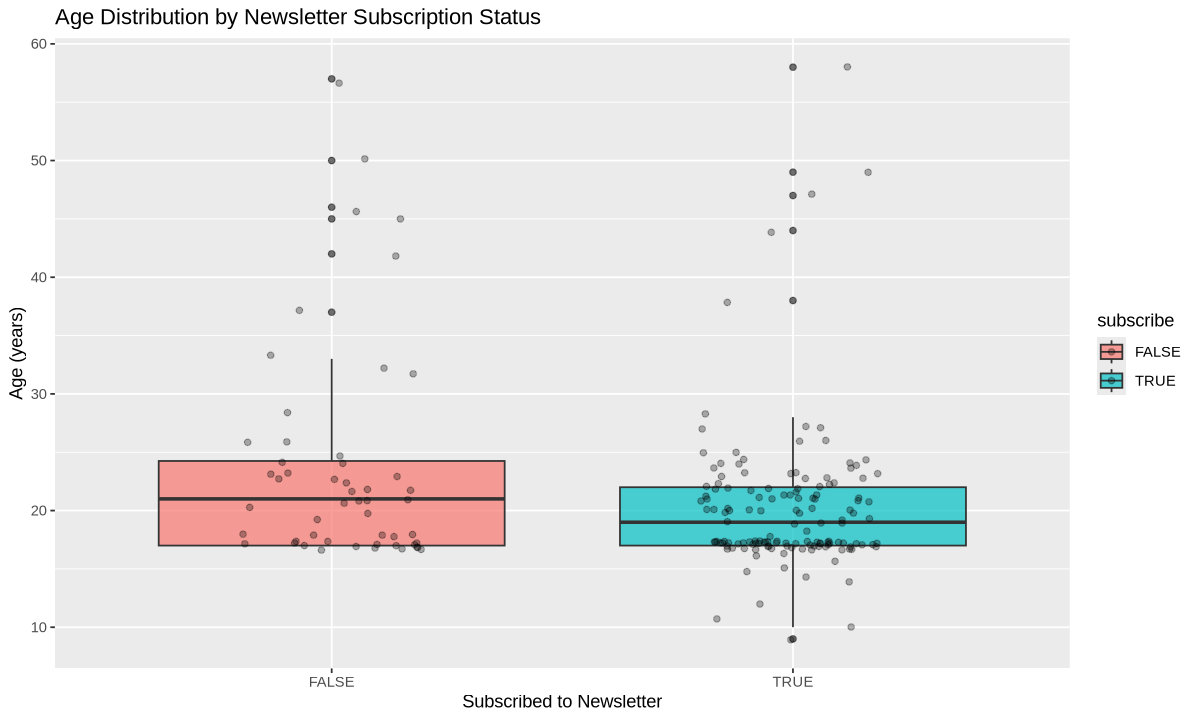

In [22]:
# Visualization 2: SUBSCRIPTION BY AGE 
ggplot(players|> filter(!is.na(Age)),
       aes(x=subscribe, y=Age, fill=subscribe))+
geom_boxplot(alpha=0.7)+
geom_jitter(width=0.2, alpha=0.3)+
labs(title="Age Distribution by Newsletter Subscription Status",
     x="Subscribed to Newsletter",
     y="Age (years)")



Table: Played Hours by Subscription Status

|subscribe | mean_hours| median_hours|   n|
|:---------|----------:|------------:|---:|
|FALSE     |       0.50|          0.0|  52|
|TRUE      |       7.78|          0.1| 144|

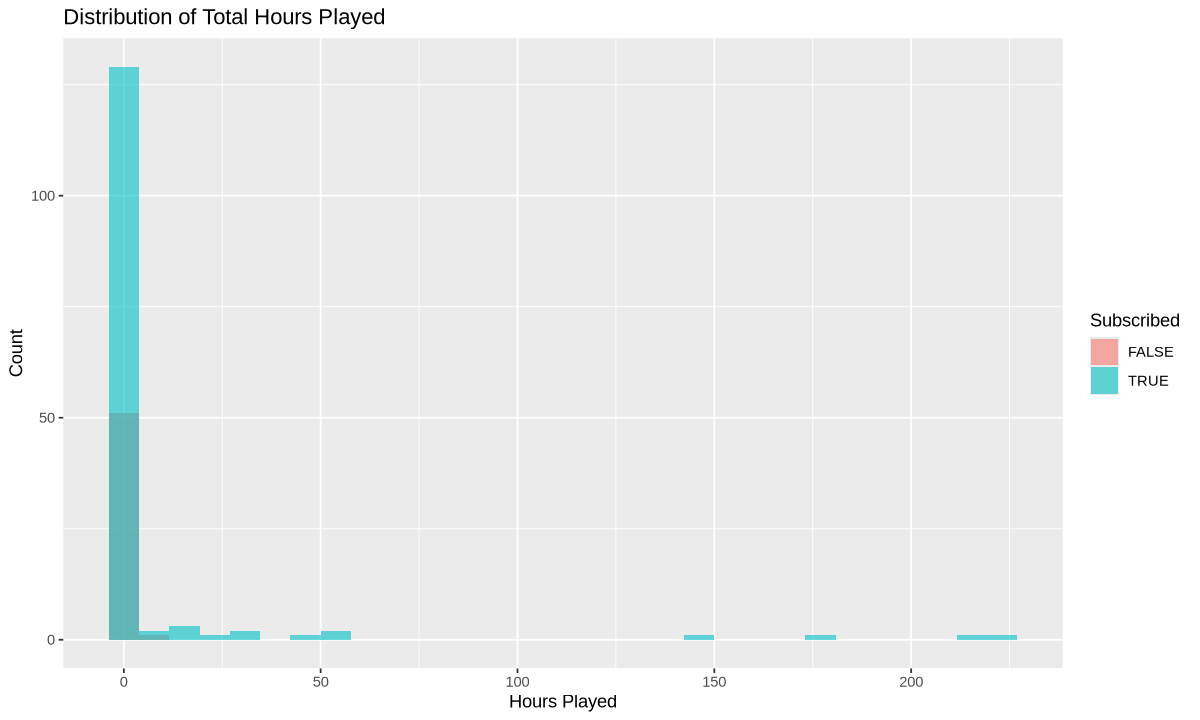

In [23]:
# Visualization 3: DISTRIBUTION OF PLAYED HOURS BY SUBSCRIPTION STATUS
ggplot(players, aes(x=played_hours, fill=subscribe))+
geom_histogram(bins=30, alpha=0.6, position="identity")+
labs(title="Distribution of Total Hours Played",
     x="Hours Played",
     y="Count",
     fill="Subscribed")

# Summary Statistics by Subscription
players|>
group_by(subscribe)|>
summarise(mean_hours=round(mean(played_hours),2),
          median_hours=round(median(played_hours),2), 
          n=n())|>
kable(caption="Played Hours by Subscription Status")

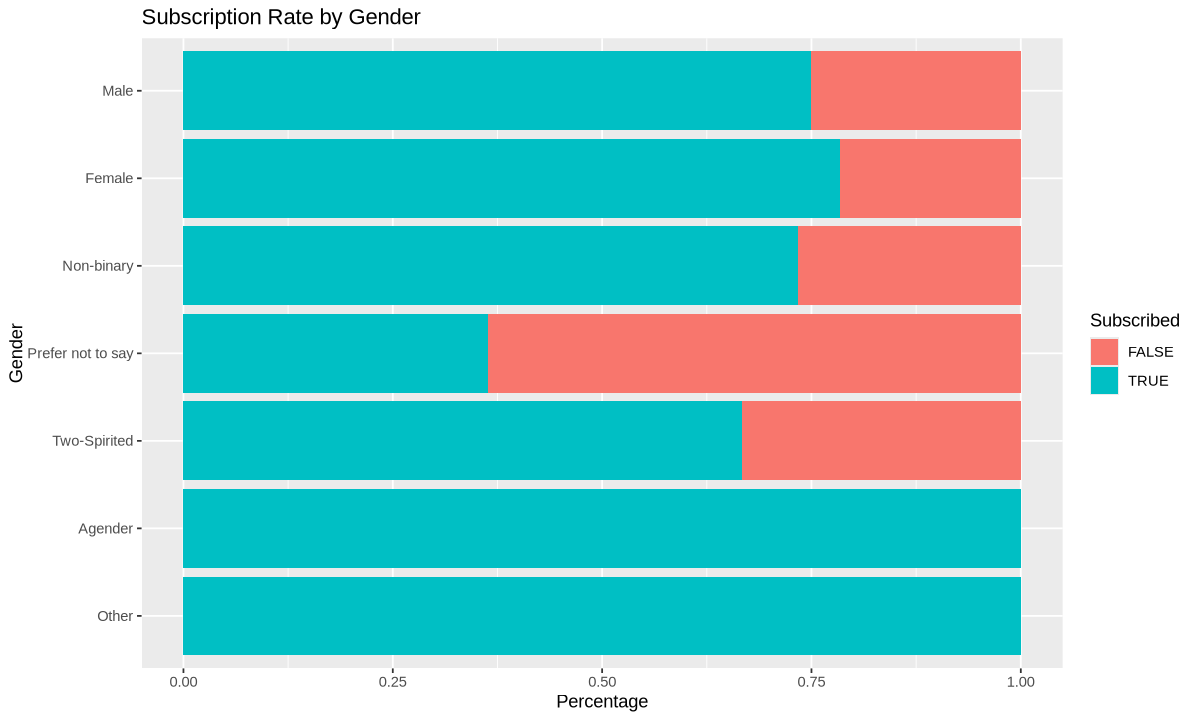

In [24]:
# Visualization 4: SUBSCRIPTION RATE BY GENDER
# gender summary
gender_summary <- players|>
group_by(gender, subscribe)|>
summarise(count=n(), .groups='drop')|>
group_by(gender)|>
mutate(total=sum(count),
       percentage=count/total*100)

ggplot(gender_summary, aes(x=reorder(gender, total), y=count, fill=subscribe))+
geom_col(position="fill")+
coord_flip()+
labs(title="Subscription Rate by Gender",
     x="Gender",
     y="Percentage",
     fill="Subscribed")

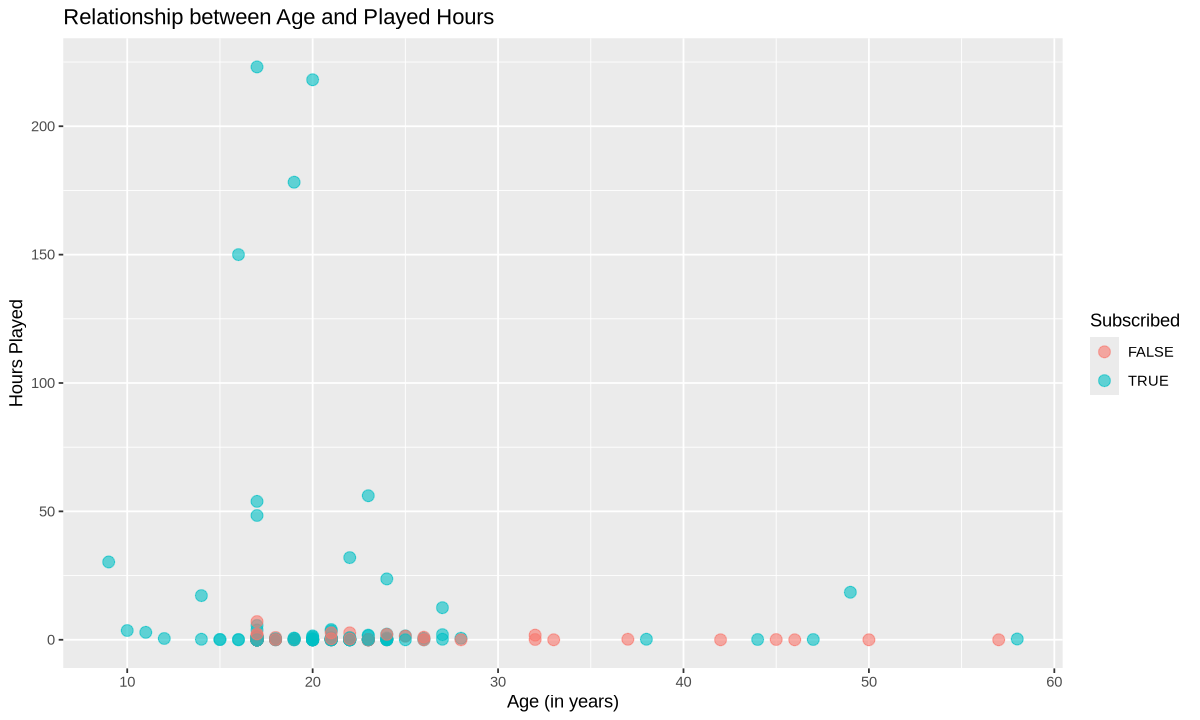

In [25]:
# VISUALIZATION: AGE VS PLAYED HOURS BY SUBSCRIPTION
ggplot(players|>filter(!is.na(Age)),
       aes(x=Age, y=played_hours, color=subscribe))+
geom_point(alpha=0.6, size=3)+
labs(title="Relationship between Age and Played Hours",
     x="Age (in years)",
     y="Hours Played",
     color="Subscribed")